In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.master('local').config('spark.driver.memory', '8g').appName('Ready_for_analysis').getOrCreate()



In [2]:
df = spark.read.parquet(
    '/Users/gabriele.sabato/PycharmProjects/raw_data/MPI/*',
    header=True)


In [3]:
df.createOrReplaceTempView('MPI_test')


In [4]:
df.show()

+-----------+-----------------------------+------------------------------------+------------------+--------------------------------+-------------------------+-------------------------+-------------------------+
|scrape_date|master_price_api_market_price|master_price_api_market_price_last3m|         item_code|master_priceapi_competitor_count|master_item_main_category|master_item_sub_category1|master_item_sub_category2|
+-----------+-----------------------------+------------------------------------+------------------+--------------------------------+-------------------------+-------------------------+-------------------------+
| 2020-12-15|                        160.7|                               160.7|000000001000150797|                             5.0|                 LEUCHTEN|            INNENLEUCHTEN|              BADLEUCHTEN|
| 2020-12-15|                       248.14|                              248.14|000000001000191998|                             5.0|                      BA

In [5]:
df2 = spark.sql('SELECT scrape_date, item_code, master_price_api_market_price_last3m as mpi,master_priceapi_competitor_count,master_item_main_category,master_item_sub_category1 from MPI_test ORDER BY scrape_date DESC')
#df2.show()

main_cat = spark.sql('SELECT DISTINCT master_item_main_category as category from MPI_test')
#main_cat.show()
cat_list = main_cat.rdd.map(lambda x: x.category).collect()
main_subcat = spark.sql('SELECT DISTINCT master_item_sub_category1 from MPI_test')
subcat_list = main_subcat.rdd.map(lambda x: x.master_item_sub_category1).collect()

In [6]:
pd_df = df2.toPandas()


In [7]:
print(cat_list)
print(subcat_list)
cat_list_copy = cat_list

['TEPPICHE & BODENBELÄGE', 'HAUSHALT', 'ESSZIMMERTISCHE', 'LEUCHTEN', 'POLSTER', 'BÜRO', 'KINDER', 'FLURMÖBEL', 'SCHLAFZIMMERMÖBEL', 'WOHNEN', 'GARTEN', 'KÜCHE', 'BOUTIQUE', 'BABY', 'HEIMTEXTILIEN', 'MATRATZEN&LATTENROSTE', 'BETTEN', 'BAD', 'ESSZIMMERSTÜHLE&BÄNKE']
['BADEMATTEN & BADTEPPICHE', 'KOMPLETTPROGRAMME & SETS', 'GARTENACCESSOIRES', 'KINDERTEPPICHE', 'GARTENZUBEHÖR', 'SITZWÜRFEL & POLSTERHOCKER', 'NACHTTISCHE', 'BETTLAKEN', 'BÜRO-KOMPLETTSETS', 'HAUSHALT', 'NACHTKOMMODEN', 'SAISONARTIKEL WEIHNACHTEN', 'BADACCESSOIRES', 'HIMMELBETTEN', 'GARTENTISCHE', 'SCHLAFZIMMERSETS', 'HANDTÜCHER', 'FUß- & SAUBERLAUFMATTEN', 'KAMINE', 'SCHLAFSOFAS', 'GARDINEN & VORHÄNGE', 'WANDEKORATION', 'BÜROSCHRÄNKE', 'ESSZIMMERSTÜHLE', 'KURZFLORTEPPICHE', 'BETTDECKEN & KOPFKISSEN', 'RECAMIEREN', 'AUFBEWAHRUNG', 'RELAXLIEGEN', 'ZUBEHÖR', 'TISCHE', 'BETTBÄNKE&BETTTRUHEN', 'TISCHWÄSCHE', 'GARTENSTÜHLE', 'BÄNKE', 'HOCHSTÜHLE & ZUBEHÖR', 'BETTGESTELLE', 'BETTEN & ZUBEHÖR', 'SPIEGEL', 'OUTDOOR-TEPPICHE', 'DUFT

In [8]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 5000)


In [9]:
print(pd_df['scrape_date'].max())
print(pd_df['scrape_date'].min())

pd_df['date_delta'] = (pd_df['scrape_date'] - pd_df['scrape_date'].min())  / np.timedelta64(7,'D')
pd_df['log_mpi']= np.log(pd_df['mpi'])

2020-12-15
2020-09-29


In [10]:
#THINK ABOUT A MINIMUM NUMBER OF POINTS TO MAKE THE PLOT REASONABLE
pd_df_one_item = pd_df[pd_df['item_code'] == '000000001000137415']

<AxesSubplot:xlabel='date_delta'>

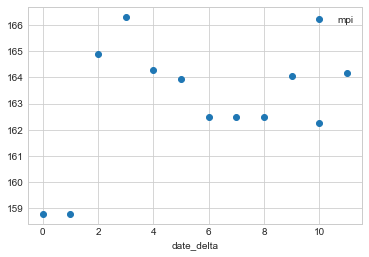

In [12]:
pd_df_one_item.plot('date_delta','mpi',style = 'o')

In [15]:
pd_df_one_item.head(20)


,scrape_date,item_code,mpi,master_priceapi_competitor_count,master_item_main_category,master_item_sub_category1,date_delta,log_mpi
6,2020-12-15,000000001000137415,164.15,5.0,LEUCHTEN,INNENLEUCHTEN,11.0,5.100781
31630,2020-12-08,000000001000137415,162.25,5.0,LEUCHTEN,INNENLEUCHTEN,10.0,5.089138
46949,2020-12-01,000000001000137415,164.05,5.0,LEUCHTEN,INNENLEUCHTEN,9.0,5.100171
79482,2020-11-24,000000001000137415,162.48,5.0,LEUCHTEN,INNENLEUCHTEN,8.0,5.090555
91758,2020-11-17,000000001000137415,162.48,5.0,LEUCHTEN,INNENLEUCHTEN,7.0,5.090555
111898,2020-11-10,000000001000137415,162.48,5.0,LEUCHTEN,INNENLEUCHTEN,6.0,5.090555
140601,2020-11-03,000000001000137415,163.92,5.0,LEUCHTEN,INNENLEUCHTEN,5.0,5.099379
173091,2020-10-27,000000001000137415,164.26,5.0,LEUCHTEN,INNENLEUCHTEN,4.0,5.101451
185925,2020-10-20,000000001000137415,166.31,5.0,LEUCHTEN,INNENLEUCHTEN,3.0,5.113854
209789,2020-10-13,000000001000137415,164.87,5.0,LEUCHTEN,INNENLEUCHTEN,2.0,5.105157


In [53]:
def run_model(data_frame=pd_df):
    return smf.ols("mpi ~ date_delta + C(item_code)",data_frame).fit()

In [54]:
print(cat_list)
cat_list.remove('HEIMTEXTILIEN')
print(cat_list)

['TEPPICHE & BODENBELÄGE', 'HAUSHALT', 'ESSZIMMERTISCHE', 'LEUCHTEN', 'POLSTER', 'BÜRO', 'KINDER', 'FLURMÖBEL', 'SCHLAFZIMMERMÖBEL', 'WOHNEN', 'GARTEN', 'KÜCHE', 'BOUTIQUE', 'BABY', 'HEIMTEXTILIEN', 'MATRATZEN&LATTENROSTE', 'BETTEN', 'BAD', 'ESSZIMMERSTÜHLE&BÄNKE']
['TEPPICHE & BODENBELÄGE', 'HAUSHALT', 'ESSZIMMERTISCHE', 'LEUCHTEN', 'POLSTER', 'BÜRO', 'KINDER', 'FLURMÖBEL', 'SCHLAFZIMMERMÖBEL', 'WOHNEN', 'GARTEN', 'KÜCHE', 'BOUTIQUE', 'BABY', 'MATRATZEN&LATTENROSTE', 'BETTEN', 'BAD', 'ESSZIMMERSTÜHLE&BÄNKE']


In [34]:
models = {}

for cat in cat_list:
    print('Category = ' + cat)
    pd_df_one_cat = pd_df[pd_df['master_item_main_category'] == cat]
    models[cat] = run_model(pd_df_one_cat)
print(models.keys())


Category = TEPPICHE & BODENBELÄGE
Category = HAUSHALT
Category = ESSZIMMERTISCHE
Category = LEUCHTEN
Category = POLSTER
Category = BÜRO
Category = KINDER
Category = FLURMÖBEL
Category = SCHLAFZIMMERMÖBEL
Category = WOHNEN
Category = GARTEN
Category = KÜCHE
Category = BOUTIQUE
Category = BABY
Category = MATRATZEN&LATTENROSTE
Category = BETTEN
Category = BAD
Category = ESSZIMMERSTÜHLE&BÄNKE
dict_keys(['TEPPICHE & BODENBELÄGE', 'HAUSHALT', 'ESSZIMMERTISCHE', 'LEUCHTEN', 'POLSTER', 'BÜRO', 'KINDER', 'FLURMÖBEL', 'SCHLAFZIMMERMÖBEL', 'WOHNEN', 'GARTEN', 'KÜCHE', 'BOUTIQUE', 'BABY', 'MATRATZEN&LATTENROSTE', 'BETTEN', 'BAD', 'ESSZIMMERSTÜHLE&BÄNKE'])


In [40]:
for categ in models.keys():
    print(categ)
    m     = models[categ].params[-1].round(2)
    m_err = models[categ].bse[-1].round(2)
    result = 'Trend = ' + str(m) + ' +/- ' + str(m_err)
    #print(models[categ].summary())
    print(result)

TEPPICHE & BODENBELÄGE
Trend = -0.15 +/- 0.04
HAUSHALT
Trend = -1.12 +/- 0.14
ESSZIMMERTISCHE
Trend = -0.56 +/- 0.19
LEUCHTEN
Trend = 0.2 +/- 0.04
POLSTER
Trend = 0.78 +/- 0.18
BÜRO
Trend = -0.68 +/- 0.12
KINDER
Trend = -0.34 +/- 0.03
FLURMÖBEL
Trend = 0.03 +/- 0.03
SCHLAFZIMMERMÖBEL
Trend = 0.4 +/- 0.38
WOHNEN
Trend = -0.5 +/- 0.11
GARTEN
Trend = 0.15 +/- 0.06
KÜCHE
Trend = 0.63 +/- 0.25
BOUTIQUE
Trend = -0.04 +/- 0.01
BABY
Trend = -0.78 +/- 0.2
MATRATZEN&LATTENROSTE
Trend = -0.22 +/- 0.12
BETTEN
Trend = -1.37 +/- 0.1
BAD
Trend = -0.26 +/- 0.11
ESSZIMMERSTÜHLE&BÄNKE
Trend = -0.58 +/- 0.05


In [57]:
#To investigate HEIMTEXTILIEN
sub_models = {}

for subcat in subcat_list:
    print('Category = ' + subcat)
    pd_df_one_subcat = pd_df[pd_df['master_item_sub_category1'] == subcat]
    sub_models[subcat] = run_model(pd_df_one_subcat)
print(sub_models.keys())


Category = BADEMATTEN & BADTEPPICHE
Category = KOMPLETTPROGRAMME & SETS
Category = GARTENACCESSOIRES
Category = KINDERTEPPICHE
Category = GARTENZUBEHÖR
Category = SITZWÜRFEL & POLSTERHOCKER
Category = NACHTTISCHE
Category = BETTLAKEN
Category = BÜRO-KOMPLETTSETS
Category = HAUSHALT
Category = NACHTKOMMODEN
Category = SAISONARTIKEL WEIHNACHTEN
Category = BADACCESSOIRES
Category = HIMMELBETTEN
Category = GARTENTISCHE
Category = SCHLAFZIMMERSETS
Category = HANDTÜCHER
Category = FUß- & SAUBERLAUFMATTEN
Category = KAMINE
Category = SCHLAFSOFAS
Category = GARDINEN & VORHÄNGE
Category = WANDEKORATION
Category = BÜROSCHRÄNKE
Category = ESSZIMMERSTÜHLE
Category = KURZFLORTEPPICHE
Category = BETTDECKEN & KOPFKISSEN
Category = RECAMIEREN
Category = AUFBEWAHRUNG
Category = RELAXLIEGEN
Category = ZUBEHÖR
Category = TISCHE
Category = BETTBÄNKE&BETTTRUHEN
Category = TISCHWÄSCHE
Category = GARTENSTÜHLE
Category = BÄNKE
Category = HOCHSTÜHLE & ZUBEHÖR
Category = BETTGESTELLE
Category = BETTEN & ZUBEHÖR

In [58]:
for subcateg in sub_models.keys():
    print(subcateg)
    m     = sub_models[subcateg].params[-1].round(2)
    m_err = sub_models[subcateg].bse[-1].round(2)
    result = 'Trend = ' + str(m) + ' +/- ' + str(m_err)
    #print(models[categ].summary())
    print(result)

BADEMATTEN & BADTEPPICHE
Trend = -0.04 +/- 0.01
KOMPLETTPROGRAMME & SETS
Trend = 0.18 +/- 0.55
GARTENACCESSOIRES
Trend = 0.14 +/- 0.06
KINDERTEPPICHE
Trend = -0.35 +/- 0.06
GARTENZUBEHÖR
Trend = -0.03 +/- 0.04
SITZWÜRFEL & POLSTERHOCKER
Trend = 0.11 +/- 0.06
NACHTTISCHE
Trend = -0.46 +/- 0.12
BETTLAKEN
Trend = -0.13 +/- 0.01
BÜRO-KOMPLETTSETS
Trend = -2.24 +/- 2.08
HAUSHALT
Trend = -1.12 +/- 0.14
NACHTKOMMODEN
Trend = 0.15 +/- 0.06
SAISONARTIKEL WEIHNACHTEN
Trend = 0.07 +/- 0.02
BADACCESSOIRES
Trend = 0.0 +/- 0.01
HIMMELBETTEN
Trend = -4.92 +/- 4.71
GARTENTISCHE
Trend = 0.22 +/- 0.18
SCHLAFZIMMERSETS
Trend = 1.04 +/- 0.59
HANDTÜCHER
Trend = -0.07 +/- 0.01
FUß- & SAUBERLAUFMATTEN
Trend = -0.14 +/- 0.02
KAMINE
Trend = -11.97 +/- 2.51
SCHLAFSOFAS
Trend = 0.48 +/- 0.39
GARDINEN & VORHÄNGE
Trend = 0.13 +/- 0.01
WANDEKORATION
Trend = -0.19 +/- 0.02
BÜROSCHRÄNKE
Trend = -1.0 +/- 0.23
ESSZIMMERSTÜHLE
Trend = -0.74 +/- 0.06
KURZFLORTEPPICHE
Trend = -0.69 +/- 0.06
BETTDECKEN & KOPFKISSEN
Trend =